In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [44]:


#df_covid_current_states=pd.read_csv('https://covidtracking.com/api/v1/states/current.csv')
#df_covid_current_states_updated=df_covid_current_states[['state','positive',]]
#print(df_covid_current_states.head())
#df_state_geo = pd.read_csv('https://raw.githubusercontent.com/kelvins/US-Cities-Database/master/csv/us_cities.csv')
#print(df_state_geo.head())
data_json=requests.get(url = 'https://www.trackcorona.live/api/cities').json()
df_states = pd.read_json(json.dumps(data_json['data']))
print(df_states)
df_states_needed = df_states[['latitude','longitude','confirmed','dead', 'recovered']]
#df_states_needed = df_states[['latitude','longitude','confirmed']]
#df_covid_current_states = pd.read_json(d)
df_states_needed.head()

                                location country_code   latitude   longitude  \
0                 Wibaux County, Montana           us  46.783665 -104.318390   
1             Chippewa County, Wisconsin           us  45.067375  -91.292467   
2                            Pilõezinhos           br  -6.843131  -35.530578   
3                                Pavussu           br  -7.964325  -43.224345   
4       Sächsische Schweiz-Osterzgebirge           de  50.898195   13.871632   
...                                  ...          ...        ...         ...   
9892              Cherokee County, Texas           us  31.798183  -95.143207   
9893            Schleicher County, Texas           us  30.923495 -100.529612   
9894          Palm Beach County, Florida           us  26.651450  -80.276733   
9895           Jones County, Mississippi           us  31.534324  -89.170600   
9896  Northampton County, North Carolina           us  36.415963  -77.424297   

      confirmed   dead  recovered  velo

,latitude,longitude,confirmed,dead,recovered
0,46.783665,-104.318390,1,0.0,NaN
1,45.067375,-91.292467,203,0.0,NaN
2,-6.843131,-35.530578,87,0.0,NaN
3,-7.964325,-43.224345,2,1.0,NaN
4,50.898195,13.871632,393,2.0,NaN


In [45]:
#EDA
df_states_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9897 entries, 0 to 9896
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   9897 non-null   float64
 1   longitude  9897 non-null   float64
 2   confirmed  9897 non-null   int64  
 3   dead       9651 non-null   float64
 4   recovered  1252 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 386.7 KB


In [46]:
print(df_states_needed.describe())
print(df_states_needed.isnull().sum())

          latitude    longitude      confirmed          dead     recovered
count  9897.000000  9897.000000    9897.000000   9651.000000   1252.000000
mean     13.905098   -43.661826     899.337981     41.673713   1169.583866
std      28.990097    52.431107    5818.149493    402.583346   4332.520954
min     -52.368047  -174.159607       0.000000      0.000000      0.000000
25%     -15.233475   -82.993161       7.000000      0.000000      5.000000
50%      25.355684   -49.012425      50.000000      1.000000     32.000000
75%      39.807989   -37.151764     297.000000      6.000000    344.250000
max      70.071821   171.695216  224863.000000  23525.000000  73402.000000
latitude        0
longitude       0
confirmed       0
dead          246
recovered    8645
dtype: int64


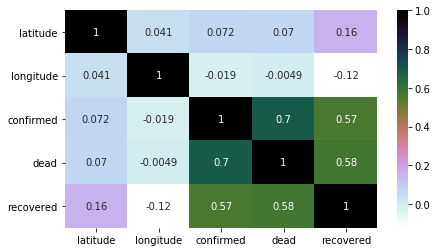

In [47]:
df_states_needed.fillna(0)
plt.figure(figsize=(7,4))
sns.heatmap(df_states_needed.corr(),annot=True,cmap='cubehelix_r')#draws heatmap with input as the correlation matrix calculated by (iris_data.corr())
plt.show()

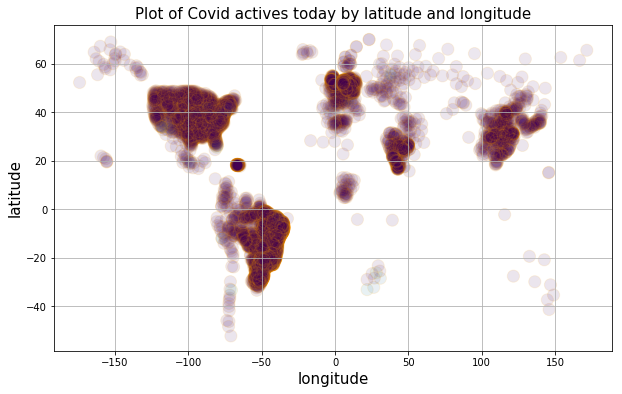

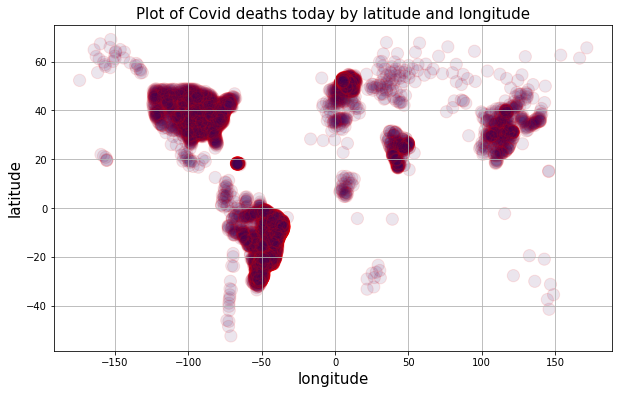

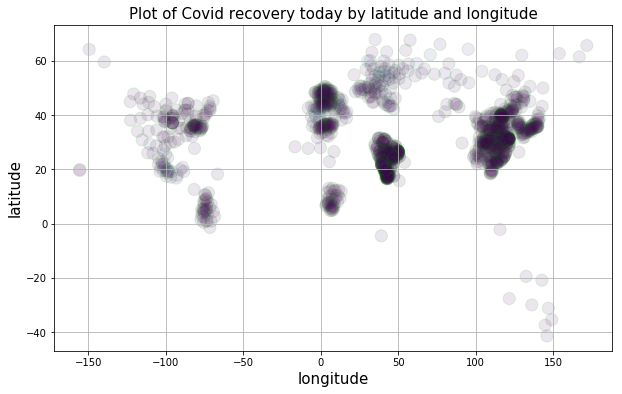

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(df_states_needed['longitude'],df_states_needed['latitude'],c=df_states_needed['confirmed'],edgecolors='orange',alpha=0.10,s=150)
plt.grid(True)
plt.xlim()
plt.title("Plot of Covid actives today by latitude and longitude",fontsize=15)
plt.xlabel("longitude",fontsize=15)
plt.ylabel("latitude",fontsize=15)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_states_needed['longitude'],df_states_needed['latitude'],c=df_states_needed['dead'],edgecolors='red',alpha=0.10,s=150)
plt.grid(True)
plt.xlim()
plt.title("Plot of Covid deaths today by latitude and longitude",fontsize=15)
plt.xlabel("longitude",fontsize=15)
plt.ylabel("latitude",fontsize=15)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_states_needed['longitude'],df_states_needed['latitude'],c=df_states_needed['recovered'],edgecolors='green',alpha=0.10,s=150)
plt.grid(True)
plt.xlim()
plt.title("Plot of Covid recovery today by latitude and longitude",fontsize=15)
plt.xlabel("longitude",fontsize=15)
plt.ylabel("latitude",fontsize=15)
plt.show()




In [54]:
#ML to find covid index for a given geographic location

from sklearn.model_selection import train_test_split
X=df_states_needed[['latitude','longitude']]
#y=df_states_needed['confirmed']
y=df_states_needed[['confirmed','dead','recovered']].fillna(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7917, 2)
(1980, 2)


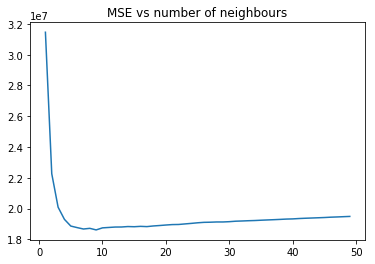

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
knnr = KNeighborsRegressor(n_neighbors = 14)
knnr.fit(X_train, y_train)
a=[]
c=[]
for n_value in  range(1,50):
    knnr = KNeighborsRegressor(n_neighbors = n_value,weights='distance',p=2)
    knnr.fit(X_train, y_train)
    a.append(n_value)
    #plt.scatter(x=n_value,y=format(np.power(y_test-knnr.predict(X_test),2).mean()),s=60,c='red')
    #print ("The MSE is:",mean_squared_error(y_test,knnr.predict(X_test))," ",n_value)
    c.append(mean_squared_error(y_test,knnr.predict(X_test)))
plt.plot(a,c)
plt.title("MSE vs number of neighbours")
plt.show()

In [58]:
params = {'n_neighbors': list(range(2,50))}
knnr = KNeighborsRegressor()
model = GridSearchCV(knnr, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 21}

In [59]:
#addressSearch = "277 communipaw ave jersey city new jersey 07205"
#addressSearch = "South Toe, NC 28714"
#addressSearch = "1255 E University Dr. Tempe | AZ 85281-4950"
#addressSearch = "balaji place cary"
#addressSearch = "green gables heritage place"
#addressSearch = "3170 bethel road columbus ohio"
#addressSearch = "2572 crescent view drive"
#addressSearch = "navaho arizona"
#addressSearch = "point loma san diego"
addressSearch = "murphy NC"
#addressSearch="3530 Alister ave sw concord 28027"

from sklearn.neighbors import KNeighborsRegressor
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="addresscodingLatLong")
location = geolocator.geocode(addressSearch)
knnr = KNeighborsRegressor(n_neighbors = model.best_params_.get('n_neighbors'))
knnr.fit(X_train, y_train)
print("Your coordinates are ",location.latitude,location.longitude)
covid_prediction=knnr.predict([[location.latitude,location.longitude]])
print("Todays covid confirmed index based on your location is - ", round(covid_prediction[0][0]))
print("Todays covid deaths index based on your location is - ", round(covid_prediction[0][1]))
#print("Todays covid recovery index based on your location is - ", round(covid_prediction[0][2]))

confirmed_numbers=arr = df_states_needed['confirmed'].to_numpy()[df_states_needed['confirmed'].to_numpy() != 0]
redvalue=np.percentile(confirmed_numbers, 95)
yellowvalue=np.percentile(confirmed_numbers, 75)
greenvalue=np.percentile(confirmed_numbers, 55)

def returnZone(covid_prediction):
    if covid_prediction>redvalue:
        return "Red Zone"
    elif covid_prediction>yellowvalue:
        return "Yellow Zone"
    else:
        return "Green Zone"



print("You are in ", returnZone(covid_prediction[0][0]))

Your coordinates are  35.0875836 -84.0346315
Todays covid confirmed index based on your location is -  1533
Todays covid deaths index based on your location is -  15
You are in  Yellow Zone
